PhotosB/2023\12\21\GPTempDownload-original.jpg
0.75


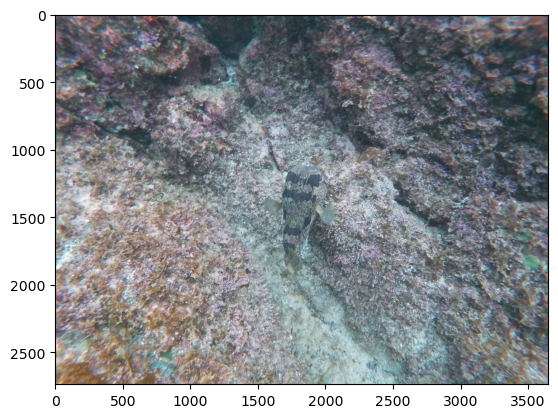

In [1]:
import sys
if "Tkinter" not in sys.modules:
    from tkinter import *
import rawpy
from PIL import Image, ImageTk
import os
import numpy as np
import matplotlib.pyplot as plt

directory = "PhotosB/"
file_paths = []
ext = ('.png', '.jpg', '.jpeg', '.HEIC', '.tiff', '.tif')
bad_ext = ('.raw', '.arw', '.dng')        
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.lower().endswith(tuple(ext)):
            file_paths.append(os.path.join(root, file))
        elif file.lower().endswith(tuple(bad_ext)):
            # pre, ext = os.path.splitext(filename)
            # print(os.path.join(directory, filename))
            # filename = os.rename(os.path.join(directory, filename), os.path.join(directory, pre + '.RAW'))
            # img = np.fromfile(os.path.join(directory, filename))
            # img = raw.raw_image
            
            # with rawpy.imread(np.fromfile("Test/DSC1160-medium.RAW", allow_pickle=True)) as raw:
            #     print(f'raw type:                     {raw.raw_type}')                      # raw type (flat or stack, e.g., Foveon sensor)
            #     print(f'number of colors:             {raw.num_colors}')                    # number of different color components, e.g., 3 for common RGB Bayer sensors with two green identical green sensors 
            #     print(f'color description:            {raw.color_desc}')                    # describes the various color components
            #     print(f'raw pattern:                  {raw.raw_pattern.tolist()}')          # decribes the pattern of the Bayer sensor
            #     print(f'black levellos:                 {raw.black_level_per_channel}')       # black level correction
            #     print(f'white level:                  {raw.white_level}')                   # camera white level
            #     print(f'color matrix:                 {raw.color_matrix.tolist()}')         # camera specific color matrix, usually obtained from a list in rawpy (not from the raw file)
            #     print(f'XYZ to RGB conversion matrix: {raw.rgb_xyz_matrix.tolist()}')       # camera specific XYZ to camara RGB conversion matrix
            #     print(f'camera white balance:         {raw.camera_whitebalance}')           # the picture's white balance as determined by the camera
            #     print(f'daylight white balance:       {raw.daylight_whitebalance}')         # the camera's daylight white balance
            pass
random_filenames = []
p = np.random.permutation(len(list(file_paths)))
[random_filenames.append(list(file_paths)[i]) for i in p]
chosen = []
for i in random_filenames:
    if i.lower().endswith('.jpg'):
        chosen = i
        
root = Toplevel()
root.wm_title("Sample Image")
make_frame = LabelFrame(root, text="Sample Image", width=100, height=100)
make_frame.pack()

print(chosen)

# create the PIL image object:
PIL_image = Image.open(chosen)
original_w = np.shape(PIL_image)[1]
original_h = np.shape(PIL_image)[0]
aspect = original_h/original_w
print(aspect)

constraining_dim = 1000
minor_constraint = min(constraining_dim/original_w, constraining_dim/original_h)
width = int(original_w * minor_constraint)
height = int(original_h * minor_constraint)

# You may prefer to use Image.thumbnail instead
# Set use_resize to False to use Image.thumbnail
use_resize = True

PIL_image_small = PIL_image.resize((width,height), Image.Resampling.LANCZOS)
plt.imshow(PIL_image)
plt.show()
# now create the ImageTk PhotoImage:
img = ImageTk.PhotoImage(image=PIL_image_small)
in_frame = Label(make_frame, image = img)
in_frame.pack()

root.mainloop()